# House Prices Predictive Model

# 1 - Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import scipy 
from scipy import stats

from library.sb_utils import save_file

In [2]:
df = pd.read_csv('../train.csv')

## High level overview of the data

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Target variable : SalePrice

# <u>SalePrice

## Sale Price Descriptive Statistics

In [6]:
pd.DataFrame(df['SalePrice'].describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


*Our descriptive statistics show a fairly large range, but the interquartile range is approximately equal to the standard deviation. This would indicate that our data is fairly well clustered.*

## Figure - Counts by Sale Price

Text(0.5, 1.0, 'Sale Price Distribution')

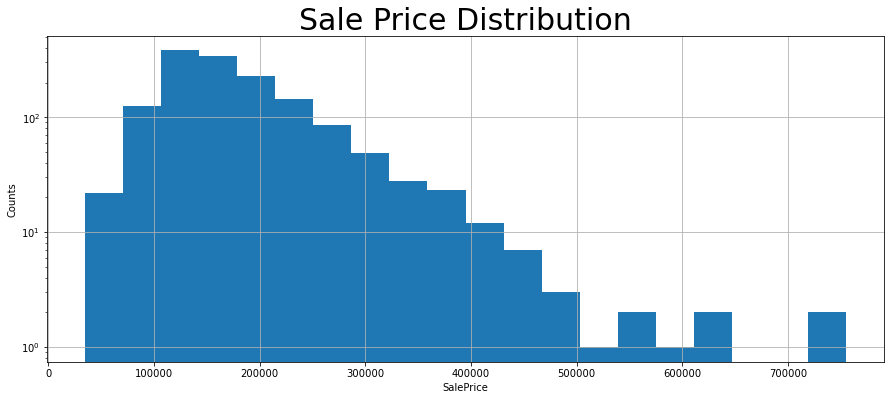

In [7]:
plt.figure(figsize=(15,6))
ax = df['SalePrice'].hist(bins=20)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.set_xlabel('SalePrice')
ax.set_title('Sale Price Distribution', size=30)

*The data have a Poisson distribution with a positive skew.*

# Data Wrangling

**We need to start by narrowing the scope of variables we are looking at. There are too many of them. I will attempt to go about accomplishing this by testing for statistical significance, and removing that which I cannot confidently reject the null hypothesis.**

# a. <u>LotArea
**Hypothesis:** Lot area will have a significant correlation with Sale Price.<br><br>
*I'm starting here because my assumption is that a home on a large piece of land should naturally be more expensive, as it includes the price of the land it sits on. I realize that this could vary dramatically depending on where the land is located. Ie. In Los Angeles or New York this might be much more significant than rural US or Canada.*

Text(0.5, 1.0, 'Lot Area Distribution')

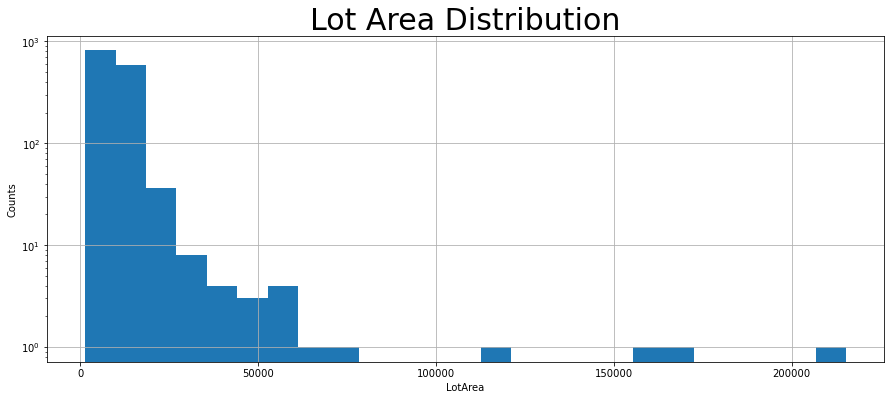

In [8]:
plt.figure(figsize=(15,6))
ax = df['LotArea'].hist(bins=25)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.set_xlabel('LotArea')
ax.set_title('Lot Area Distribution', size=30)

*The LotArea data have an approximately logarithmic distribution.*

### Figure a.1 - Correlation of LotArea and SalePrice

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


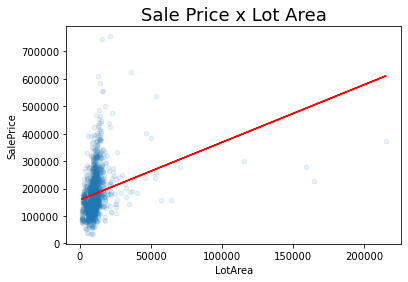

correlation : (0.2638433538714057, 1.1231391549193063e-24)


In [9]:
model = sm.OLS(df.SalePrice, sm.add_constant(df.LotArea))
p = model.fit().params
x = df.LotArea
ax = df.plot(x='LotArea', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, p.const + p.LotArea * x, c='r')
plt.title('Sale Price x Lot Area',size=18)
plt.rc("figure", figsize=(8,5))
plt.show()
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df.LotArea))

*There is a clearly significant correlation between sale price and lot area, as the p-value is well below the generally accepted threshold of .05.*

### Figure a.2 - Histogram of LotArea and SalePrice

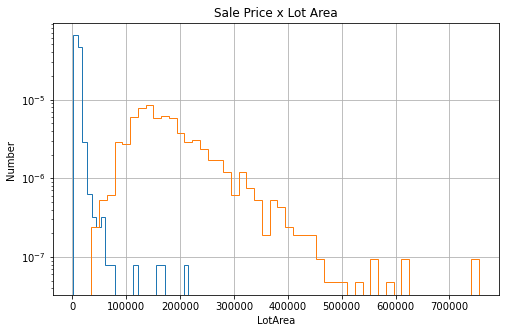

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


In [10]:
ax = df['LotArea'].hist(bins=25, histtype='step', density=True)
bx = df['SalePrice'].hist(bins=50, histtype='step',density=True)
ax.set_yscale('log')
ax.set_ylabel('Number ')
ax.set_xlabel('LotArea')
ax.set_title('Sale Price x Lot Area')
plt.show()
pd.DataFrame(df['LotArea'].describe())

**Despite the presence of a statistically significant correlation between LotArea and SalePrice, and the fact that both appear to be Poisson distributions, the skew is a little different, as the LotArea seems to be nearly logarithmic. So while the correlation is there, I believe there will be a better variable to explain the variation in our data. As you see in the chart above, the LotArea values are concentrated at lower values. The distributions are nearly logarithmic for LotArea and something closer to a Gaussian distribution in the SalePrice variable. I believe the correlation may be explained by the fact that a smaller lot limits the size of the house, such that larger homes can't fit on them, and that to area of the home itself is the major driver in price, and explains the majority of variation in LotArea. For this reason, I don't feel that I can confidently reject the null hypothesis.**

# c. <u>Examination of Total Area</u>
**Hypothesis:** Measures of area will have a statistically significant effect on Sale Price.

Text(0.5, 1.0, 'First Floor Area Distribution')

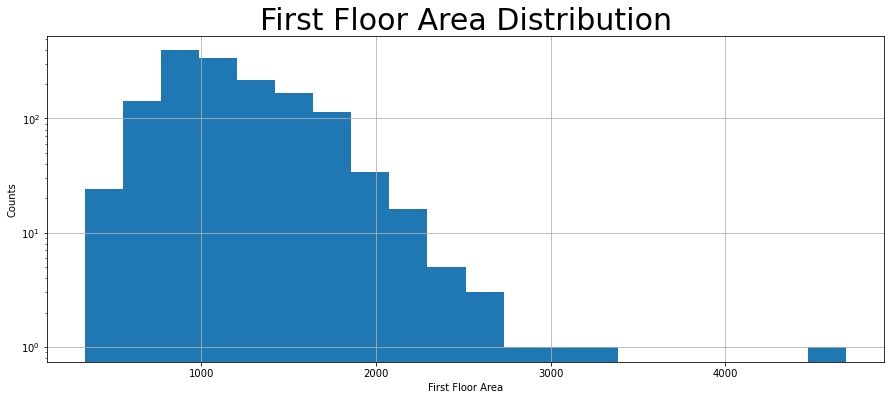

In [11]:
plt.figure(figsize=(15,6))
ax = df['1stFlrSF'].hist(bins=20)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.set_xlabel('First Floor Area')
ax.set_title('First Floor Area Distribution', size=30)

*Immediately I notice, that this chart looks similar to the distribution of SalePrice.*

### Figure c.1 - First Floor Area - SalePrice correlation

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


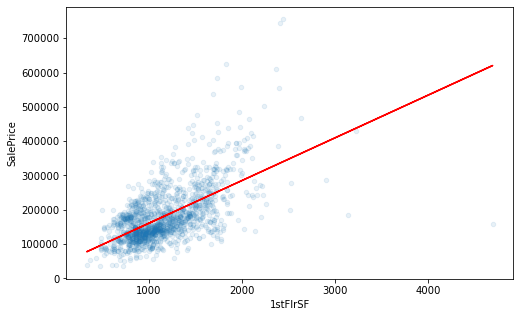

correlation : (0.6058521846919146, 5.394710618971284e-147)


In [12]:
sf_model = sm.OLS(df.SalePrice, sm.add_constant(df['1stFlrSF']))
sf_p = sf_model.fit().params
x = df['1stFlrSF']
ax = df.plot(x='1stFlrSF', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, sf_p.const + sf_p['1stFlrSF'] * x, c='r')
plt.show()
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df['1stFlrSF']))

### Figure c.2 - Second Floor Area(non-zero values) - SalePrice correlation

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


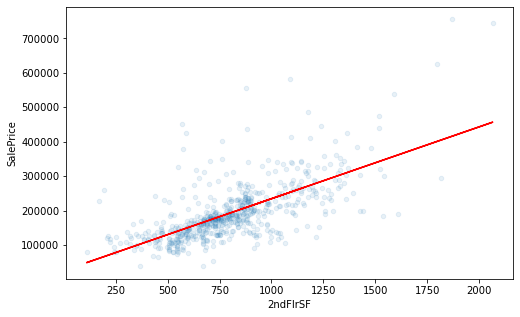

correlation : (0.6733048324568381, 1.53336249389489e-84)


In [13]:
sf2_df = pd.DataFrame(df[df['2ndFlrSF'] !=0])
sf2_model = sm.OLS(sf2_df.SalePrice, sm.add_constant(sf2_df['2ndFlrSF']))
sf2_p = sf2_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = sf2_df['2ndFlrSF']
# scatter-plot data
ax = sf2_df.plot(x='2ndFlrSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, sf2_p.const + sf2_p['2ndFlrSF'] * x, c='r')
plt.show()
print ("correlation :",scipy.stats.pearsonr(sf2_df.SalePrice, sf2_df['2ndFlrSF']))

*What stands out about these two scatter plots is that they share very similar correlation coefficients. So I will combine them to get a single column of TotalSF.*

### Combine the 1stFlrSF and 2ndFlrSF columns

In [14]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df.drop(columns=['1stFlrSF','2ndFlrSF'], inplace=True)

### Figure c.3 - Total Area Correlation to SalePrice

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


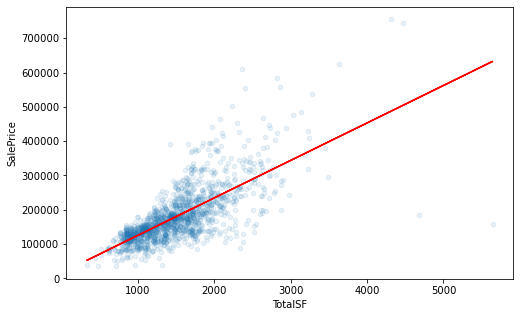

correlation : (0.7168830793692811, 1.183940787187772e-230)


In [15]:
sf_tot_model = sm.OLS(df.SalePrice, sm.add_constant(df['TotalSF']))
sf_tot_p = sf_tot_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df['TotalSF']
# scatter-plot data
ax = df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, sf_tot_p.const + sf_tot_p['TotalSF'] * x,c='r')
plt.show()
print ("correlation :",scipy.stats.pearsonr(df.SalePrice, df['TotalSF']))

*Notice this correlation is steeper than in either of the previous two, with a greater significance as demonstrated by the p-values than either the first or second floor area alone.*

*I'm now going to look into basement area columns. I will either combine them with together or with TotalSF.*

### Figure c.4 - Correlation between SalePrice and Finished Basement size

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


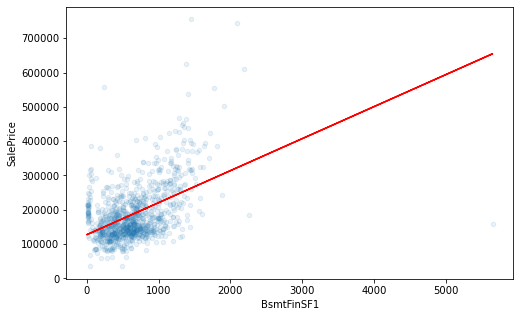

correlation : (0.4716904265235731, 3.7404328484059427e-56)


In [16]:
sfb_df = pd.DataFrame(df[df['BsmtFinSF1'] !=0])
sfb_model = sm.OLS(sfb_df.SalePrice, sm.add_constant(sfb_df['BsmtFinSF1']))
sfb_p = sfb_model.fit().params
x = sfb_df['BsmtFinSF1']
ax = sfb_df.plot(x='BsmtFinSF1', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, sfb_p.const + sfb_p['BsmtFinSF1'] * x, c='r')
plt.show()
print("correlation :",scipy.stats.pearsonr(sfb_df.SalePrice, sfb_df['BsmtFinSF1']))

### Figure c.5 - Correlation between Finished Basement Area and Total Square footage

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


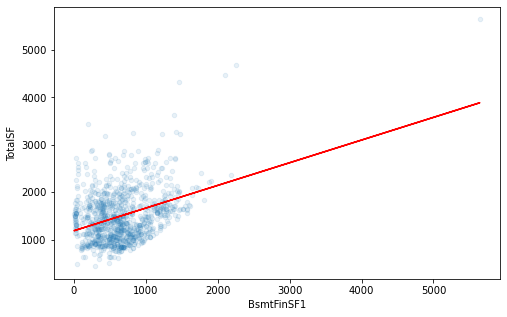

correlation : (0.36099824135966696, 6.25327800349369e-32)


In [17]:
sf2_df = pd.DataFrame(df[df['BsmtFinSF1'] !=0])
sf2_model = sm.OLS(sf2_df.TotalSF, sm.add_constant(sf2_df['BsmtFinSF1']))
sf2_p = sf2_model.fit().params
x = sf2_df['BsmtFinSF1']
ax = sf2_df.plot(x='BsmtFinSF1', y='TotalSF', kind='scatter', alpha = 0.1)
ax.plot(x, sf2_p.const + sf2_p['BsmtFinSF1'] * x, c='r')
plt.show()
print ("correlation :",scipy.stats.pearsonr(sf2_df.TotalSF, sf2_df['BsmtFinSF1']))

### Figure c.6 - Correlation of Unfinished Basement Area and SalePrice

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


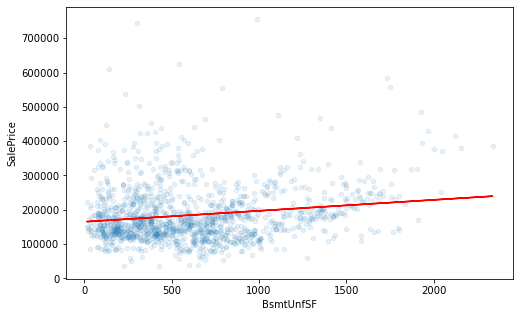

correlation : (0.16926100049514187, 4.378835472890501e-10)


In [18]:
sfub_df = pd.DataFrame(df[df['BsmtUnfSF'] !=0])
sfub_model = sm.OLS(sfub_df.SalePrice, sm.add_constant(sfub_df['BsmtUnfSF']))
sfub_p = sfub_model.fit().params
x = sfub_df['BsmtUnfSF']
ax = sfub_df.plot(x='BsmtUnfSF', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, sfub_p.const + sfub_p['BsmtUnfSF'] * x, c='r')
plt.show()
print ("correlation :",scipy.stats.pearsonr(sfub_df.SalePrice, sfub_df['BsmtUnfSF']))

### Figure c.7 - Correlation of Unfinished Basement Area and LotArea

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


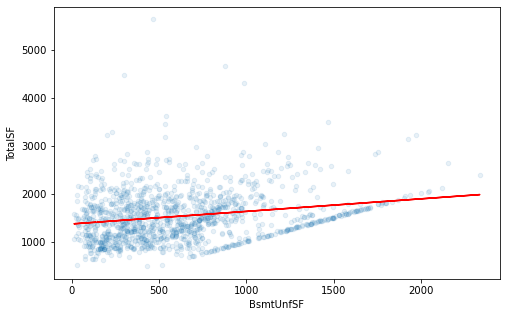

correlation : (0.2151719936382433, 1.6043391720940365e-15)


In [19]:
sfub_model = sm.OLS(sfub_df.TotalSF, sm.add_constant(sfub_df['BsmtUnfSF']))
sfub_p = sfub_model.fit().params
x = sfub_df['BsmtUnfSF']
ax = sfub_df.plot(x='BsmtUnfSF', y='TotalSF', kind='scatter', alpha = 0.1)
ax.plot(x, sfub_p.const + sfub_p['BsmtUnfSF'] * x, c='r')
plt.show()
print ("correlation :",scipy.stats.pearsonr(sfub_df.TotalSF, sfub_df['BsmtUnfSF']))

*What I notice here is that there is a slightly similar, and statistically significant relationship between the type and size of basement and total area, and also sale price. Finished basements have a stronger correlation on both Sale Price and TotalSF, which seems to me indicative of the fact that the correlation is a function of that which exists between TotalSF and SalePrice. I will explore this below.*

### Figure c.8 - Correlation between TotalSF and SalePrice grouped by Basement type, among homes with basements

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


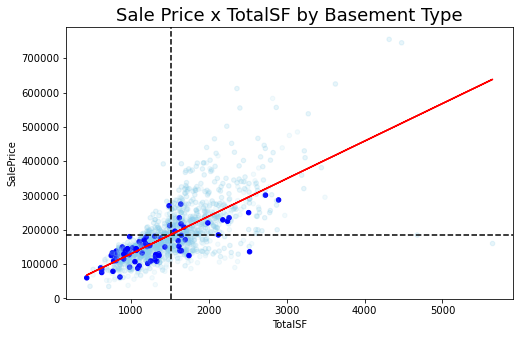

correlation : (0.7191054120359357, 0.0)


In [20]:
temp_df = df[df['BsmtUnfSF'] > 0].append(df[df['BsmtFinSF1'] > 0])
model = sm.OLS(temp_df.SalePrice, sm.add_constant(temp_df.TotalSF))
colors = np.where(temp_df.BsmtUnfSF > 0,'skyblue','blue')
transparency = np.where(temp_df.BsmtUnfSF > 0,.1,1)
p = model.fit().params
x = temp_df.TotalSF
ax = temp_df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha=transparency, c=colors)
xline= temp_df.TotalSF.mean()
plt.axvline(x = xline, color = 'k', label = '',linestyle='--')
y= p.TotalSF * xline + p.const
plt.axhline(y = y, color = 'k', label = '',linestyle='--')
ax.plot(x, p.const + p.TotalSF * x, c='r')
plt.title('Sale Price x TotalSF by Basement Type',size=18)
plt.rc("figure", figsize=(8,5))
plt.show()
print ("correlation :",scipy.stats.pearsonr(temp_df.SalePrice, temp_df.TotalSF))

*As previously thought, there is a strong, and statistically significant relationship between SalePrice and TotalSF.*

In [21]:
print("Unfinished basement mean SalePrice:  " + "\033[1;48;34m$ {:,.2f}".format(df[df['BsmtUnfSF'] != 0]['SalePrice'].mean()))
print("\033[mNo basement mean SalePrice:  " + "\033[1;48;34m$ {:,.2f}".format(df[(df['BsmtUnfSF'] == 0) & (df['BsmtFinSF1'] == 0)]['SalePrice'].mean()))
print("\033[mFinished basement mean SalePrice:  " + "\033[1;48;34m$ {:,.2f}".format(df[df['BsmtFinSF1'] != 0]['SalePrice'].mean()) + os.linesep)

print("\033[mUnfinished basement mean SF:  " + "\033[1;48;34m {:,.0f}".format(df[df['BsmtUnfSF'] != 0]['TotalSF'].mean()))
print("\033[mNo basement mean SF:  " + "\033[1;48;34m {:,.0f}".format(df[(df['BsmtUnfSF'] == 0) & (df['BsmtFinSF1'] == 0)]['TotalSF'].mean()))
print("\033[mFinished basement mean SF:  " + "\033[1;48;34m {:,.0f}".format(df[df['BsmtFinSF1'] != 0]['TotalSF'].mean()))

Unfinished basement mean SalePrice:  $ 184,790.89
No basement mean SalePrice:  $ 105,652.89
Finished basement mean SalePrice:  $ 188,164.59

Unfinished basement mean SF:   1,530
No basement mean SF:   1,288
Finished basement mean SF:   1,501


*The means shown above seem to indicate that the difference between the means of homes with basements, and those without basements is significant, and also similar. Looking at the mean area, homes with basements are larger, but not even 20% larger on average. where the average price is approx. 80% greater. With this in mind, I will add the basement area to the TotalSF column.*

In [22]:
#I'm going to combine the Finished and Unfinished Basement data with the TotalSF column.
print(df['TotalSF'].mean())
df['TotalSF'] = df['TotalSF'] + df['BsmtUnfSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']
print(df['TotalSF'].mean())

1509.6191780821919
2567.0486301369865


### Figure c.9 - Correlation of SalePrice and TotalSF grouped by basement type with basement area added to TotalSF, excludes observations with no basement

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


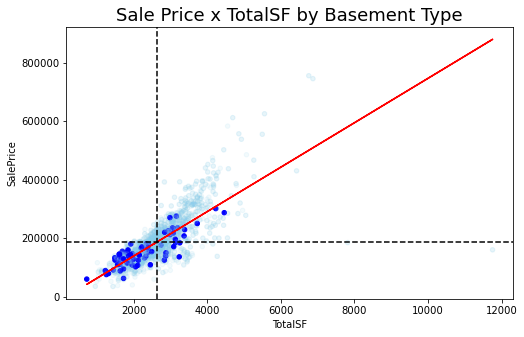

correlation : (0.7712634362827611, 0.0)


In [23]:
temp_df = df[df['BsmtUnfSF'] > 0].append(df[df['BsmtFinSF1'] > 0])
model = sm.OLS(temp_df.SalePrice, sm.add_constant(temp_df.TotalSF))
colors = np.where(temp_df.BsmtUnfSF > 0,'skyblue','blue')
transparency = np.where(temp_df.BsmtUnfSF > 0,.1,1)
p = model.fit().params
x = temp_df.TotalSF
ax = temp_df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha=transparency, c=colors)
ax.plot(x, p.const + p.TotalSF * x, c='r')
xline= temp_df.TotalSF.mean()
plt.axvline(x = xline, color = 'k', label = '',linestyle='--')
y= p.TotalSF * xline + p.const
plt.axhline(y = y, color = 'k', label = '',linestyle='--')
plt.title('Sale Price x TotalSF by Basement Type',size=18)
plt.rc("figure", figsize=(8,5))
plt.show()
print ("correlation :",scipy.stats.pearsonr(temp_df.SalePrice, temp_df.TotalSF))

*We see that by adding the basement areas to our column TotalSF, the resultant dataset results in a greater explaination of variance.*

### Figure c.10 - Correlation of SalePrice to TotalSF with basement areas added

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


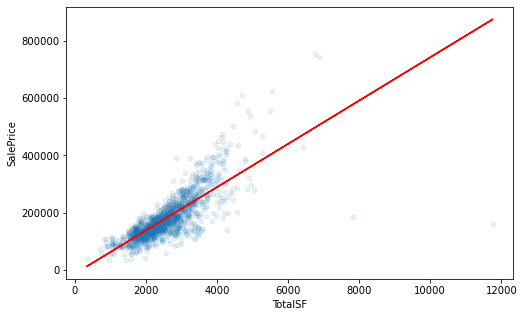

correlation : (0.7822600527979842, 5.511173086257728e-302)


In [24]:
sf_tot_model = sm.OLS(df.SalePrice, sm.add_constant(df['TotalSF']))
sf_tot_p = sf_tot_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df['TotalSF']
# scatter-plot data
ax = df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, sf_tot_p.const + sf_tot_p['TotalSF'] * x,c='r')
plt.show()
print("correlation :",scipy.stats.pearsonr(df.SalePrice, df['TotalSF']))

**In this section we determined that TotalSF with basement area included is very highly statistically significantly correlated to our target variable, SalePrice. As seen above, the our p-value is slightly larger than it was when we excluded homes without a basement, but still very small with Total Area being defined as the sum of the ares of the first floor, second floor, and basement areas. With this, we can reject the null hypothesis and confidently assert that the correlation between TotalSF, as defined above, and SalePrice is statiscally significant, and explains a lot of the variance in our data.**

# f. <u>Overview of the columns with integer data types</u>
**Hypothesis :** There will be some variables in the dataset, beyond those we've already defined, that will be statistically significant.

In [25]:
df.select_dtypes('int64').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
OverallCond,5,8,5,5,5,5,5,6,5,6,...,5,5,5,5,5,5,6,9,6,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950,...,1974,2009,2005,2006,2005,2000,1988,2006,1996,1965
BsmtFinSF1,706,978,486,216,655,732,1369,859,0,851,...,0,0,547,0,410,0,790,275,49,830
BsmtFinSF2,0,0,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,163,0,1029,290
BsmtUnfSF,150,284,434,540,490,64,317,216,952,140,...,896,1573,0,1140,811,953,589,877,0,136


### Taking another look into the descriptive statistics for SalePrice

In [26]:
#Range, mean and median of home values
print('\033[4mRange of prices:\033[m' + os.linesep + '\033[m\n\033[1;48;34m$' + str(df['SalePrice'].min()) + ' - $' + str(df['SalePrice'].max()))
print('\n' + '\033[mMean: \033[1;48;34m$' + "{:,.2f}".format(df['SalePrice'].mean()))
print('\033[mMedian: \033[1;48;34m$' + "{:,.2f}".format(df['SalePrice'].median()))

Range of prices:

$34900 - $755000

Mean: $180,921.20
Median: $163,000.00


### Loop over all of the int datatypes and examine the correlations in those columns with SalePrice, removing those with small correlation coefficients, which are indicative of explaining less of the variation in our dataset.

OverallQual  correlation :  (0.7909816005838048, 2.185675268e-313)
GrLivArea  correlation :  (0.7086244776126521, 4.518033646779945e-223)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


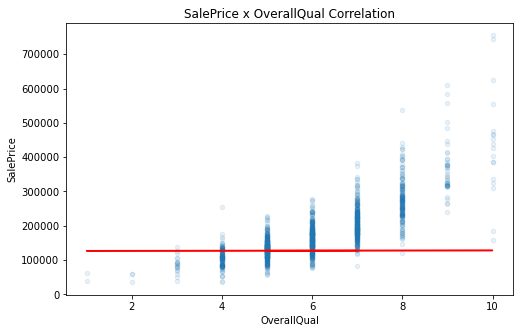

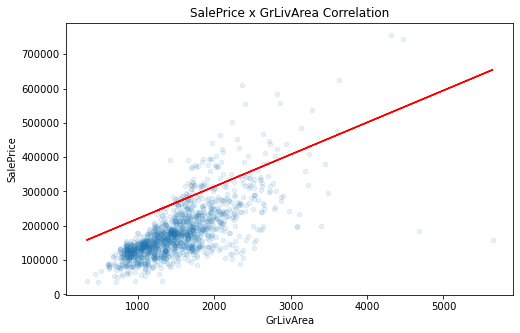

In [27]:
for idx, column in enumerate(df.select_dtypes('int64').columns):
    if(column not in ['Id', 'SalePrice', 'MSSubClass','MSZoning', 'TotalSF']):
        col_model = sm.OLS(df.SalePrice, sm.add_constant(df[column]))
        col_p = sfb_model.fit().params
        corrcoef = scipy.stats.pearsonr(df.SalePrice, df[column])
        if(np.abs(corrcoef[0]) > .7):
            col=col_p.iloc[1]
            x = df[column]
            ax = df.plot(x=column, y='SalePrice', kind='scatter', alpha = 0.1)
            ax.plot(x,col_p.const + col * x, c='r')
            plt.title('SalePrice x ' + column + ' Correlation')
            print(column, " correlation : ",corrcoef)
        else: 
            df.drop(columns=[column])

**We have narrowed down a good list of variables to lok into here. I can confidently reject the null hypothesis, as there are several variables that are significant. Note: Above, we have trendlines that are relatively flat within due to the presence of categorical values as integers.**

# g. <u>Overview of the columns with categorical data types</u>
**Hypothesis :** There will be some variables in the dataset, beyond those we've already defined, that will be statistically significant.

In [28]:
df.select_dtypes('object').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


### How many null values are there per column?

In [29]:
find_null_columns = {}
for column in df.columns:
    if(len(df[df[column].isnull()]) > 0):
        find_null_columns[column] = len(df[df[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print('\033[m ' + k + ': \033[1;48;34m' + str(v) + '\n')

Number of null values:

 PoolQC: 1453

 MiscFeature: 1406

 Alley: 1369

 Fence: 1179

 FireplaceQu: 690

 LotFrontage: 259

 GarageType: 81

 GarageYrBlt: 81

 GarageFinish: 81

 GarageQual: 81

 GarageCond: 81

 BsmtExposure: 38

 BsmtFinType2: 38

 BsmtQual: 37

 BsmtCond: 37

 BsmtFinType1: 37

 MasVnrType: 8

 MasVnrArea: 8

 Electrical: 1



*There is such little data on pools, I want to remove pool related columns, only after looking at the data.*

# h. <u>Examine pool related columns</u>
**Hypothesis :** There will be some variables in the dataset, beyond those we've already defined, that will be statistically significant.

Text(0.5, 1.0, 'Pool Area Distribution')

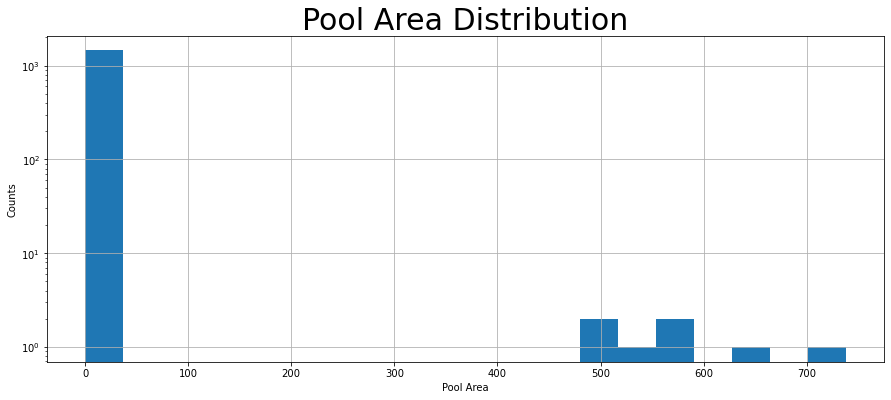

In [30]:
plt.figure(figsize=(15,6))
df.PoolArea.replace(to_replace=np.nan, value=0, inplace=True)
ax = df['PoolArea'].hist(bins=20)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.set_xlabel('Pool Area')
ax.set_title('Pool Area Distribution', size=30)

In [31]:
print('\033[1;48;34mList of the PoolArea of pools and SalePrice of associated homes: \033[m',os.linesep)
print(str(df[df['PoolArea'] > 0]['PoolArea']) + os.linesep*2 + str(df[df['PoolArea'] > 0]['SalePrice']))

List of the PoolArea of pools and SalePrice of associated homes:  

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

197     235000
810     181000
1170    171000
1182    745000
1298    160000
1386    250000
1423    274970
Name: SalePrice, dtype: int64


*I notice an interesting trend in that pools are associated with higher sales prices.
With that said, I don't think it tells much in terms of size, and with such little pool data,
I believe the most important factor is whether the home has a pool or not, and that may be
significant, therefore I will remove these values and simply add a column HasPool boolean.
In the event that I later find that pools are a significant explanation of outliers, then I 
may remove those observations from the dataset.*

In [32]:
print(df.shape)
print(df['PoolQC'].unique())
df['HasPool'] = df['PoolQC'].isin(['Ex','Fa','Gd'])
print(df.shape)
df.drop(columns=['PoolQC','PoolArea'], inplace=True)
print(len(df[df['HasPool']]))
print(df.shape)

(1460, 80)
[nan 'Ex' 'Fa' 'Gd']
(1460, 81)
7
(1460, 79)


### T-test for HasPool and SalePrice

In [33]:
rvs1=df[df['HasPool'] == True]['SalePrice']
rvs2=df[df['HasPool'] == False]['SalePrice']
stats.ttest_ind(rvs1, rvs2)
### TODO: Look into chi-squared and ANOVA.
### remove one with smallest sample size.

Ttest_indResult(statistic=3.593943524548988, pvalue=0.000336552381430235)

**The ttest indicates that HasPool is statistically significant, so we will reject the null hypothesis.**

# <u>Overview of the remaining columns</u>

*Another look at how our data is shaping up after removing many columns to decide what to do next.*

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*I'm also going to look into the values of MiscFeature to see if there may be enough data to analyze.*

# o. <u>MasVnrArea</u>
**Hypothesis:** MasVnrArea will have a statistically significant impact on SalePrice, our target variable.

In [35]:
df['MasVnrType'].replace(to_replace=np.nan, value='None', inplace=True)
df['Electrical'].replace(to_replace=np.nan, value='None', inplace=True)
df['MasVnrArea'].replace(to_replace=np.nan, value=0.0, inplace=True)
print(df[df['MasVnrArea'] > 2]['MasVnrArea'].count())
print("${:,.0f}".format(df[df['MasVnrArea'] > 2]['SalePrice'].mean()))
print("${:,.0f}".format(df[df['MasVnrArea'] <= 2]['SalePrice'].mean()))

589
$215,878
$157,282


215878.06451612903
      MasVnrArea>2  SalePrice>mean
0             True            True
1            False            True
2             True            True
3            False           False
4             True            True
...            ...             ...
1455         False           False
1456          True            True
1457         False            True
1458         False           False
1459         False           False

[1460 rows x 2 columns]


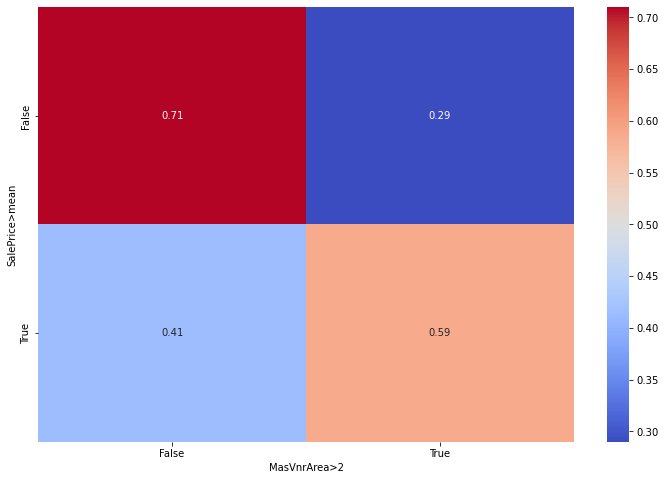

In [36]:
print(df[df['MasVnrArea'] > 2]['SalePrice'].mean())
temp_df = pd.DataFrame()
temp_df['MasVnrArea>2'] = df['MasVnrArea'] > 2
temp_df['SalePrice>mean'] = df['SalePrice'] > df['SalePrice'].mean()
print(temp_df)
contigency_pct = pd.crosstab(temp_df['SalePrice>mean'], temp_df['MasVnrArea>2'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="coolwarm")
plt.show()

**It appears that MasVnrArea is not strongly correlated to higher values, therefore I am unable to reject the null hypothesis.**

correlation : (0.4726144990045738, 4.100461044539401e-82)


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


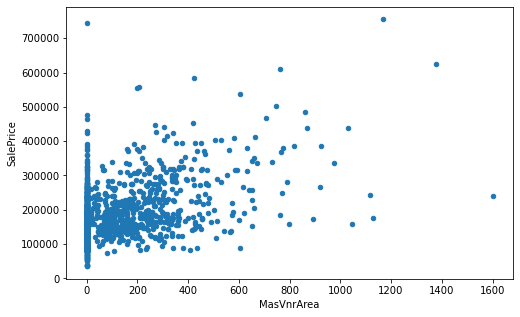

In [37]:
 
# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(df.SalePrice, sm.add_constant(df.MasVnrArea))
# p = model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df.SalePrice
# scatter-plot data
ax = df.plot(x='MasVnrArea', y='SalePrice', kind='scatter')
# plot regression line on the same axes, set x-axis limits
# ax.plot(x, p.const + p.SalePrice* x)
print ("correlation :",scipy.stats.pearsonr(df.MasVnrArea, df.SalePrice) )

In [38]:
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence',
 'MiscFeature']

*It would appear that we no longer have any null values.*

# <u>Wrap up data wrangling, ensuring the variable remaining are statistically significant.</u>

In [39]:
# Import cleaned data
df = pd.read_csv('../data/house_data_cleaned.csv')

In [40]:
corr = df.select_dtypes('int64').corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF
Id,1.000000,0.011156,-0.028365,-0.015415,0.008273,0.016570,-0.021917,-0.000322
MSSubClass,0.011156,1.000000,0.032628,-0.238518,0.074853,-0.040110,-0.084284,-0.082225
OverallQual,-0.028365,0.032628,1.000000,0.537808,0.593007,0.600671,0.790982,0.668155
TotalBsmtSF,-0.015415,-0.238518,0.537808,1.000000,0.454868,0.434585,0.613581,0.826742
GrLivArea,0.008273,0.074853,0.593007,0.454868,1.000000,0.467247,0.708624,0.874373
GarageCars,0.016570,-0.040110,0.600671,0.434585,0.467247,1.000000,0.640409,0.536413
SalePrice,-0.021917,-0.084284,0.790982,0.613581,0.708624,0.640409,1.000000,0.782260
TotalSF,-0.000322,-0.082225,0.668155,0.826742,0.874373,0.536413,0.782260,1.000000


# In summary, we now have 19 columns to explore to further explain the variance in our target variable, SalePrice.